<a href="https://colab.research.google.com/github/RajabovX/MachineLearning/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PolynomialRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = {
    'Humidity (%)': [20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Rainfall (mm)': [2, 5, 15, 25, 40, 55, 70, 85, 100]
}
df = pd.DataFrame(data)

df.to_csv('Rainfall_Data.csv', index=False)
print("Dataset saved as 'Rainfall_Data.csv'")

Dataset saved as 'Rainfall_Data.csv'


In [ ]:
X = df['Humidity (%)'].values.reshape(-1, 1)
y = df['Rainfall (mm)'].values

In [ ]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

In [ ]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [ ]:
y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [ ]:
sort_idx = X.flatten().argsort()
X_sorted = X[sort_idx].reshape(-1, 1)
X_poly_sorted = poly_features.transform(X_sorted)
y_curve = model.predict(X_poly_sorted)

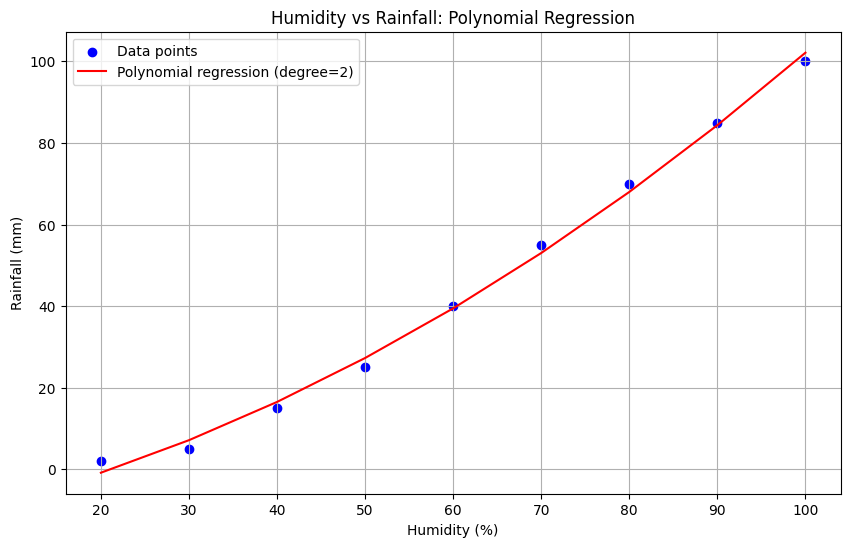

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_sorted, y_curve, color='red', label='Polynomial regression (degree=2)')
plt.title('Humidity vs Rainfall: Polynomial Regression')
plt.xlabel('Humidity (%)')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Polynomial regression results:")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Polynomial regression results:
MSE: 3.70
R²: 0.9967
Coefficients: [0.         0.44770563 0.00699134]
Intercept: -12.580952380951615


In [ ]:
def predict_rainfall(humidity):
    humidity_array = np.array([humidity]).reshape(-1, 1)
    humidity_poly = poly_features.transform(humidity_array)
    predicted_rainfall = model.predict(humidity_poly)
    return predicted_rainfall[0]

In [ ]:
print("\nSample predictions:")
test_humidity = [25, 50, 75, 95]
for hum in test_humidity:
    rainfall = predict_rainfall(hum)
    print(f"For {hum}% humidity, predicted rainfall: {rainfall:.2f} mm")


Sample predictions:
For 25% humidity, predicted rainfall: 2.98 mm
For 50% humidity, predicted rainfall: 27.28 mm
For 75% humidity, predicted rainfall: 60.32 mm
For 95% humidity, predicted rainfall: 93.05 mm
